In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize 
import pandas as pd
from collections import Counter
import string
import pickle

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

## Parsing and Processing Content

In [41]:
df = pd.read_csv('../../processed_files/webis/webis.csv')
df.head()

,file_number,file_type,filename,text,paraphrase
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True


In [42]:
# do not specify axis as parameter when running lambda on series
df['TEXT_PARSED'] = df['text'].apply(lambda row: word_tokenize(row))
df.head()

,file_number,file_type,filename,text,paraphrase,TEXT_PARSED
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[M., Comte, would, not, advise, so, irrational..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[Even, M., Comte, would, spurn, such, irration..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[Picture, illustrating, the, shortest, and, ea..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[This, picture, exemplifies, the, straight, an..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[Thad, ,, of, course, ., And, ,, Bill, ,, we, ..."


In [43]:
df_content_tokens = [item for sublist in df['TEXT_PARSED'].values for item in sublist]

In [44]:
counts = Counter(df_content_tokens)

In [45]:
counts.most_common(10)

[(',', 375218),
 ('the', 313687),
 ('.', 209510),
 ('of', 198220),
 ('and', 152951),
 ('to', 123814),
 ('a', 99721),
 ('in', 92402),
 ('that', 53987),
 ('is', 53575)]

In [46]:
df_2 = df.copy(deep=True)

In [47]:
#df_2['TEXT_PARSED'] = df_2['TEXT'].apply(lambda row: row.split())
#df_2.head()

In [48]:
df_2['TEXT_PARSED'] = df_2['TEXT_PARSED'].apply(lambda row: [token.lower() for token in row])
df_2.head()

,file_number,file_type,filename,text,paraphrase,TEXT_PARSED
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m., comte, would, not, advise, so, irrational..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, m., comte, would, spurn, such, irration..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, the, shortest, and, ea..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this, picture, exemplifies, the, straight, an..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, ,, of, course, ., and, ,, bill, ,, we, ..."


In [49]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [50]:
table = str.maketrans('', '', string.punctuation)
df_2_content_tokens = [item for sublist in df_2['TEXT_PARSED'].values for item in sublist]
#df_en_2_content_tokens

In [51]:
df_2_content_tokens_stripped = [w.translate(table) for w in df_2_content_tokens]
df_2_content_tokens_stripped[:10]

['m',
 'comte',
 'would',
 'not',
 'advise',
 'so',
 'irrational',
 'a',
 'proceeding',
 '']

## Stopwords

In [52]:
counts_2 = Counter(df_2_content_tokens_stripped)
#nltk stopword list is 179 words
counts_2.most_common(18)

[('', 803100),
 ('the', 345282),
 ('of', 200987),
 ('and', 158936),
 ('to', 126383),
 ('a', 106403),
 ('in', 100203),
 ('that', 55867),
 ('is', 54405),
 ('it', 47663),
 ('was', 45049),
 ('i', 42595),
 ('he', 39358),
 ('as', 38806),
 ('with', 38559),
 ('his', 37203),
 ('for', 37005),
 ('be', 31849)]

In [53]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
len(stopwords.words('english'))

179

In [55]:
#counts_2.most_common(179)

In [56]:
common_stopwords = set(stopwords.words('english'))

In [57]:
corpus_stopwords = set([i[0] for i in counts_2.most_common(179)])

In [58]:
in_both_lists = common_stopwords.intersection(corpus_stopwords)

In [59]:
len(in_both_lists)

102

In [60]:
list(in_both_lists)[:10]

['the', 'few', 'his', 'being', 'we', 'here', 'through', 'most', 'been', 'if']

## Heaps' Law

In [61]:
df_2.head()

,file_number,file_type,filename,text,paraphrase,TEXT_PARSED
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m., comte, would, not, advise, so, irrational..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, m., comte, would, spurn, such, irration..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, the, shortest, and, ea..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this, picture, exemplifies, the, straight, an..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, ,, of, course, ., and, ,, bill, ,, we, ..."


In [62]:
df_2_new = df_2.reset_index()
df_2_new = df_2_new.drop(columns=['index'])
df_2_new.head()

,file_number,file_type,filename,text,paraphrase,TEXT_PARSED
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m., comte, would, not, advise, so, irrational..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, m., comte, would, spurn, such, irration..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, the, shortest, and, ea..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this, picture, exemplifies, the, straight, an..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, ,, of, course, ., and, ,, bill, ,, we, ..."


In [63]:
# number of documents processed, number of unique 
num_docs_num_unique = [(0,0)]
unique = set()
for index,row in df_2_new.iterrows():
    unique.update(row['TEXT_PARSED'])
    num_docs = index + 1
    num_unique = len(unique)
    num_docs_num_unique.append((num_docs, num_unique))

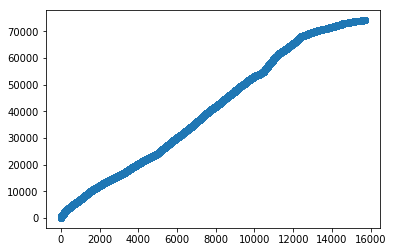

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*num_docs_num_unique)
plt.scatter(x, y)
plt.show()

In [65]:
most_to_least = sorted(counts_2.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items = []
for index, item in enumerate(most_to_least):
    most_to_least_plot_items.append((index, item[1]))

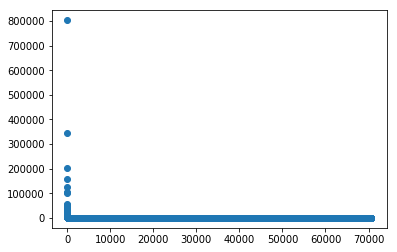

In [66]:
x, y = zip(*most_to_least_plot_items)
plt.scatter(x, y)
plt.show()

## Zipf's Law

In [67]:
most_to_least_2 = sorted(counts_2.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items_2 = []
for index, item in enumerate(most_to_least):
    if index < 20:
        continue
    if index >= 500:
        break
    most_to_least_plot_items_2.append((index, item[1]))

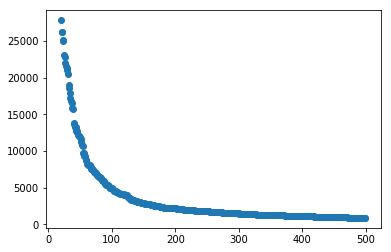

In [68]:
x2, y2 = zip(*most_to_least_plot_items_2)
plt.scatter(x2, y2)
plt.show()

In [69]:
#most_to_least_plot_items_2

## Stopword lists

In [70]:
common_stopwords = set(stopwords.words('english'))

In [71]:
with open('../../processed_files/stopwords/webis_common_stopwords.pickle', 'wb') as file:
    pickle.dump(common_stopwords, file)

In [72]:
corpus_stopwords = set([i[0] for i in counts_2.most_common(100)])

In [73]:
with open('../../processed_files/stopwords/webis_corpus_stopwords.pickle', 'wb') as file:
    pickle.dump(corpus_stopwords, file)

In [74]:
combined_stopwords = common_stopwords.union(corpus_stopwords)

In [75]:
with open('../../processed_files/stopwords/webis_combined_stopwords.pickle', 'wb') as file:
    pickle.dump(combined_stopwords, file)